In [1]:
import numpy as np, matplotlib.pyplot as plt, cv2, tqdm
%matplotlib inline

from importlib import reload

from utils import saveVideo, show, drawShape
import cvflow as cf, utils

In [2]:
import skvideo.io

videoPrefices = ('project',)# 'challenge', 'harder_challenge')
allFrames = {}
for videoPrefix in videoPrefices:
    fpath = '%s_video.mp4' % videoPrefix
    reader = skvideo.io.FFmpegReader(fpath)
    frames = []
    maxframes = min(100, reader.inputframenum)
    bar = tqdm.tqdm_notebook(
        total=maxframes,
        desc='load %s' % videoPrefix,
    )
    for frame in reader.nextFrame():
        if len(frames) == maxframes:
            break
        bar.update()
        frames.append(frame)
    allFrames[videoPrefix] = frames

HBox(children=(IntProgress(value=0, description='load project: '), HTML(value='')))

In [3]:
frame = frames[10]

((<matplotlib.figure.Figure at 0x7f8da8efe400>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f8da8f0bd30>),
 (720, 1280, 3))

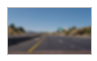

In [4]:
image = cf.baseOps.ColorImage()
image.value = frame

blur = cf.baseOps.Blur(image, ksize=129)
fig, ax = plt.subplots(figsize=(1.6, .9))
utils.show(blur.value, ax=ax), blur.value.shape

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

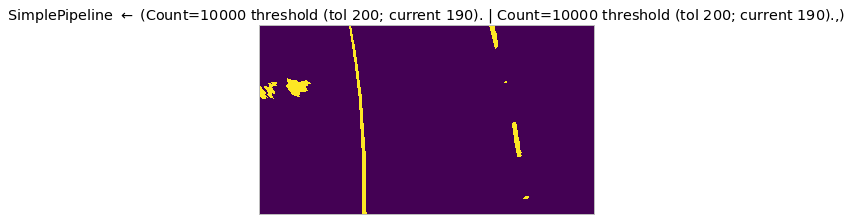

In [5]:
simplePipeline = cf.SimplePipeline()
simplePipeline(frame)

simplePipeline.showValue()

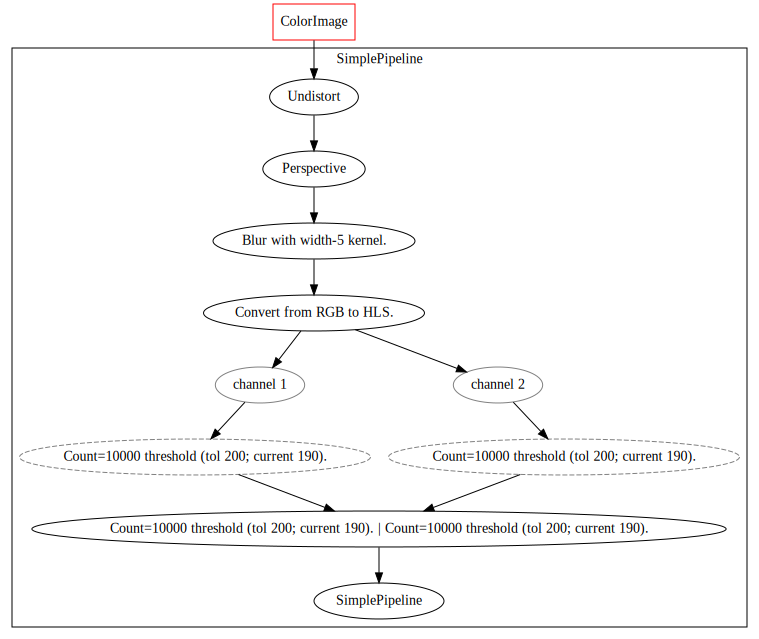

In [6]:
simplePipeline.draw()

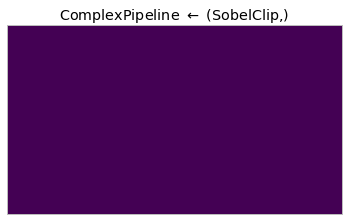

In [7]:
complexPipeline = cf.ComplexPipeline()
complexPipeline(frame)

complexPipeline.showValue()

Saved to /tmp/test.png.


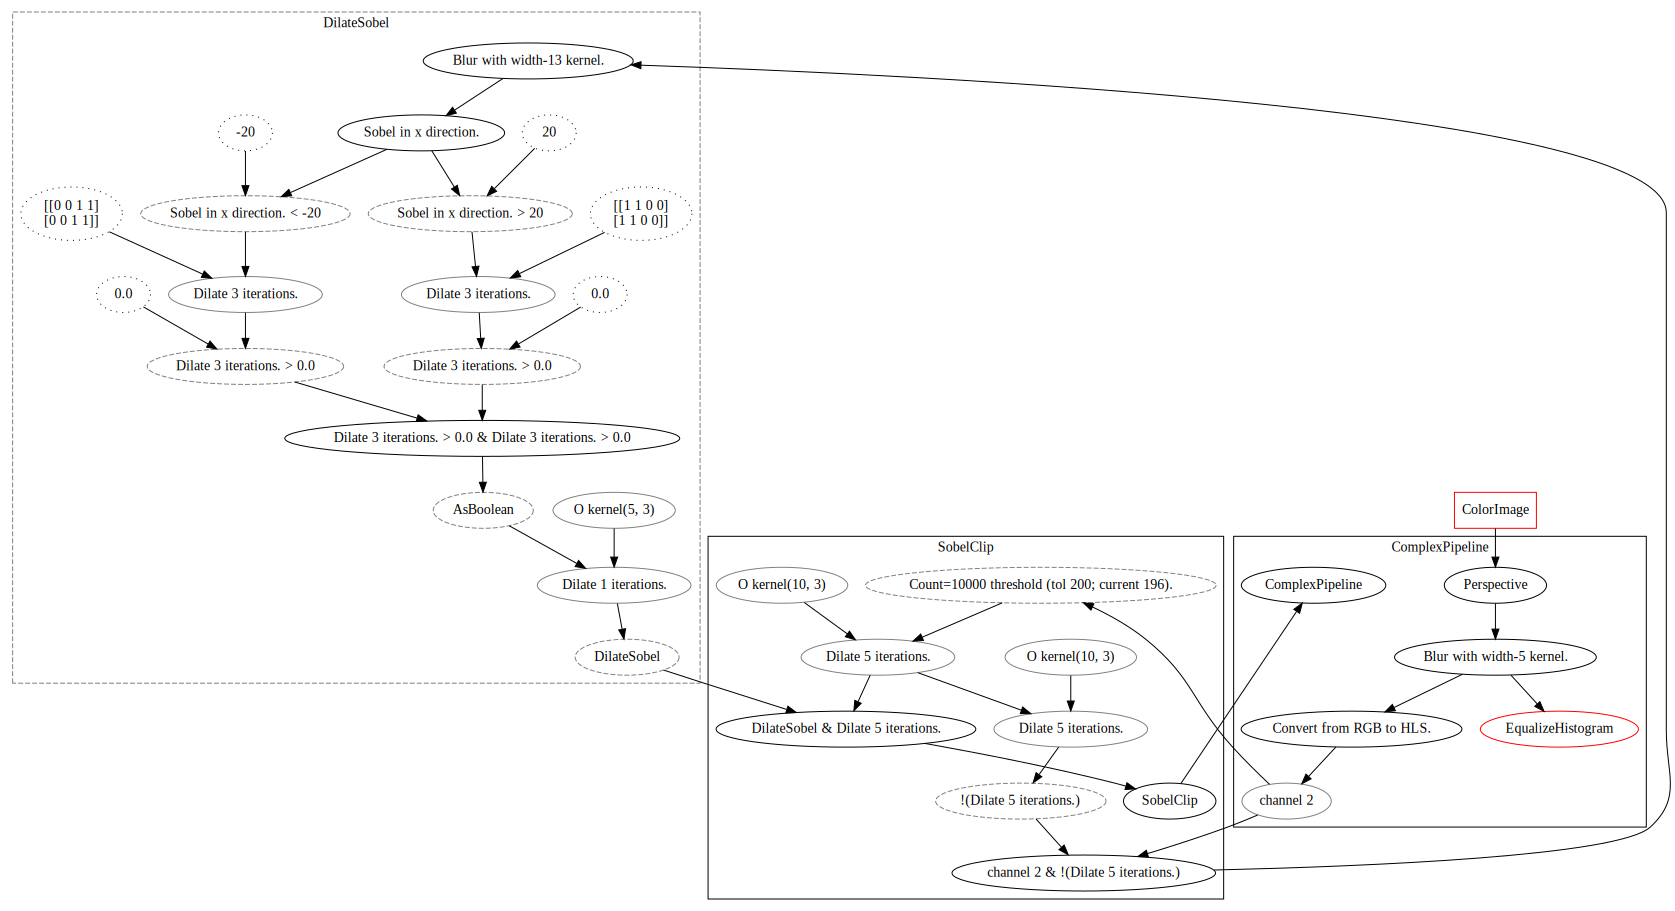

In [8]:
complexPipeline.draw('/tmp/test')